In [2]:
from astropy.io import fits,ascii
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.stats import ks_2samp
from astropy import units as u

In [3]:
homedir = os.getenv("HOME")
sys.path.append(homedir+'/github/APPSS/')
from a100sdss import ks, anderson
sys.path.append(homedir+'/github/LCS/python/Python3/')
from LCScommon import *

Running on coma


In [4]:
plotdir = homedir+'/research/LCS/plots/'


# Write Out Files for Benedetta

* GSWLC, LCS core, LCS infall
* B/T < 0.3

In [61]:
os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13.5-2020Nov11-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433


In [62]:
# create flag to select gsw sample
gflag = (b.gsw.cat['logMstar'] > b.masscut) & (b.gsw.ssfr > b.ssfrcut)
# create flag to select LCS core sample
cflag = b.lcs.cat['membflag'] &  (b.lcs.cat['logMstar']> b.masscut)  & (b.lcs.ssfr > b.ssfrcut)
# create flag to select LCS infall sample
iflag = (~b.lcs.cat['membflag'])  & (b.lcs.cat['DELTA_V'] < 3.) &  (b.lcs.cat['logMstar']> b.masscut)  & (b.lcs.ssfr > b.ssfrcut)

In [63]:
gtab = Table(b.gsw.cat)['logMstar','logSFR'][gflag]
ctab = Table(b.lcs.cat)['logMstar','logSFR'][cflag]
itab = Table(b.lcs.cat)['logMstar','logSFR'][iflag]

In [64]:
gtab.write('gswcl_sfr_mstar_13_5_2020Nov11.fits',format='fits',overwrite=True)
ctab.write('lcs_core_sfr_mstar_2020Nov11.fits',format='fits',overwrite=True)
itab.write('lcs_infall_sfr_mstar_2020Nov11.fits',format='fits',overwrite=True)

# Compare B/T distribution of core and infall galaxies #

* need to see if BT distribution is similar
* if not, we will need to cut on BT for the simulation
* otherwise we will conflate multiple factors


CONCLUSION
* B/T of core/infall are significantly different. pvalue = 1.6e-10 
* after cutting B/T < 0.3, the difference is much smaller.  pvalue = 0.015

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
Ks_2sampResult(statistic=0.19962034066172146, pvalue=8.03292987683335e-11)
Ks_2sampResult(statistic=0.1669138650845968, pvalue=0.000948641503473513)


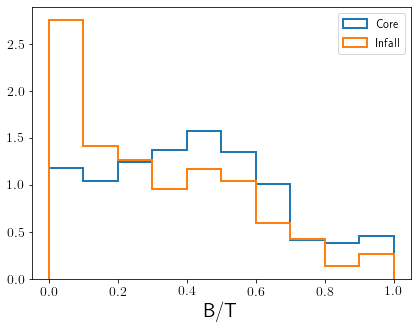

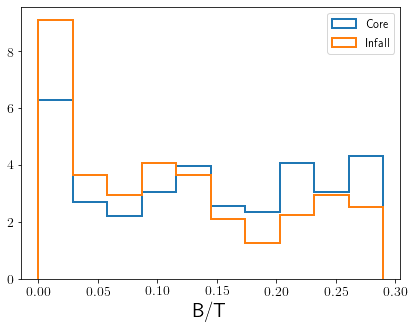

In [159]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcscore-external-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-BTcut.png'
b.lcs_compare_BT()#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

# Comparison of LCS with GSWLC #

- The GSWLC provides a better comparison sample for us.
- I matched to GSWLC-X2 - used 5 arcsecond radius.  found 1496 matches.
  - I didn't note how I did the match.  I don't see any python programs, so I probably used topcat.
  - redoing on 5/29/20
  - matching LCS_all_size_KE_SFR.fits with GSWLC-X2-LCS-Zoverlap.dat
  - matching NSA RA,DEC with GSWLC RA,DEC
    - 5 arcsec offset
    - best match, symmetric
    - 1 and 2
    - found 1477 pairs (~20 fewer than last time :( )
   - 10 arcsec search radius
     - 1487 pairs
   - 15 arcsec search radius
     - 1490 pairs
- we can use the GSWLC SFRs and Stellar masses for both the LCS and comparison galaxies.  This removes significant uncertainty associated with mixing methods for calculating SFR and Mstar.

- redshift limit $0.01 < z < 0.03$
- mag limit r petrosian $r = 18.0$
- main sequence: $log10(sSFR) > -11$
- explanation of GSWLC-2 catalog http://pages.iu.edu/~salims/gswlc/table2.pdf

**Stellar Mass Limit**

- convert r to Mr at maximum distance of LCS ($z=.0433$)
- then plot Mstar vs Mr, and estimate Mstar limit from Mr limit

**SFR Limit**
- Salim+2018 use $log10(sSFR) > -11$ to select star-forming galaxies
- $log10(sSFR) < -11.5$ should be considered upper limits GSWLC-A (Salim+2018, pg 11, col2)
  - we use this as our sSFR limit
- for SF galaxies, SFR errors are typically below 0.1dex

**Environment Catalogs**
- yang+07
- tempel+2012 - http://www.aai.ee/~elmo/dr8groups/readme.txt
- decarvalha+2017

# SFR - Mstar: no B/T cut #

repeating above three plots, but for SFR vs Mstar

### SFR-M*: LCS core vs GSWLC field, no BT cut ###

* SFRs are VERY different
* stellar masses are different

**need to make a mass-matched sample?**
as a counter point, the difference in stellar mass distributions are due to the 
GSWLC sample having lower mass galaxies. This would increase the fraction of low-SFR galaxies in the GSWLC sample, yet the LCS core galaxies have even lower SFRs. 

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  153
number in gsw sample =  4459
just checking ... 4455 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 1.242e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.30
p-vale = 4.644e-12 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

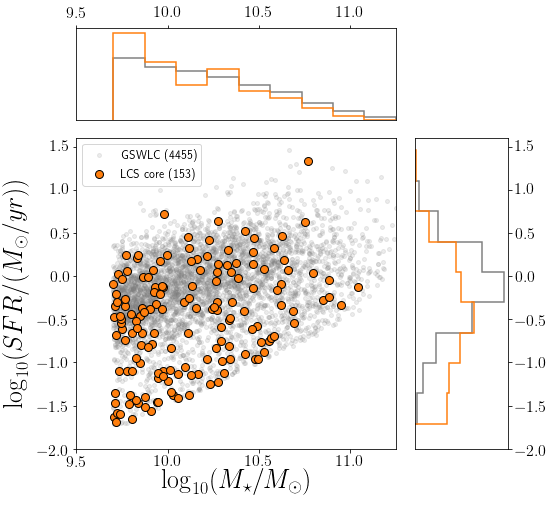

In [160]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False)

### mass-matched sample ###

### LCS Core vs GSWLC, no BT cut, mass matching ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  153
number in gsw sample =  4459
just checking ... 3060 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.05
p-vale = 8.087e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.27
p-vale = 3.927e-10 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

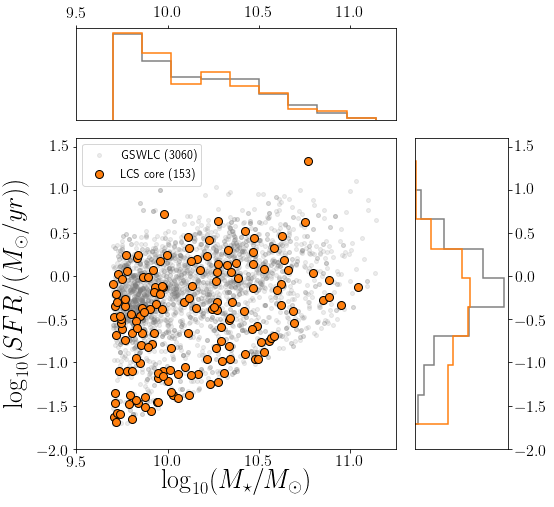

In [161]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True)

In [162]:
sum(b.lcs.cat['sampleflag'] & b.lcs.cat['membflag'])

91

### SFR-M*: LCS infall vs GSWLC, no BT cut ###

* stellar masses are very diff (more low-mass galaxies in gswlc)
* SFRs are not different

**again, need mass-matched sample**

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  116
number in gsw sample =  4459
just checking ... 4455 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 1.566e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.22
p-vale = 4.359e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

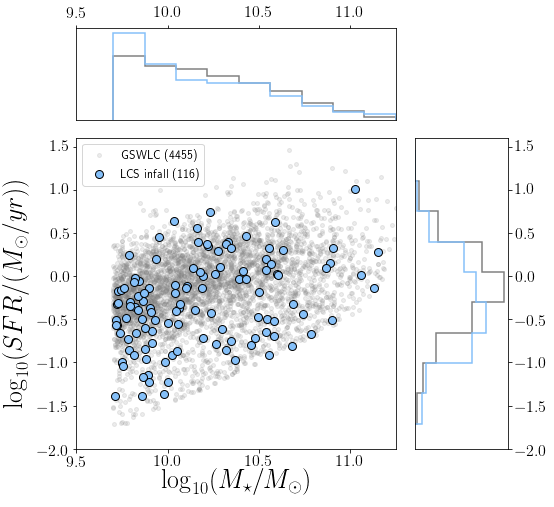

In [163]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=False)

### SFR-M*: LCS infall vs GSWLC, no BT cut, with mass matching ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  116
number in gsw sample =  4459
just checking ... 2316 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.04
p-vale = 9.946e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 5.965e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

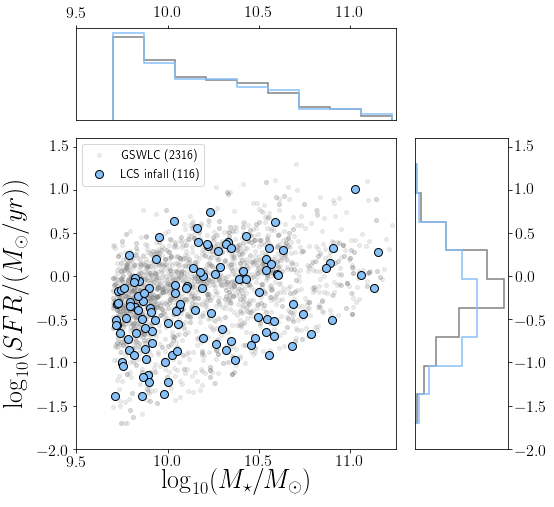

In [164]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=True)

### SFR-M*: LCS core vs infall, no BT cut ###

* stellar masses are not diff 
* SFRs are not different

**again, need mass-matched sample**

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  116
just checking ... 153 116
9.702
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.08
p-vale = 6.880e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 3.007e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

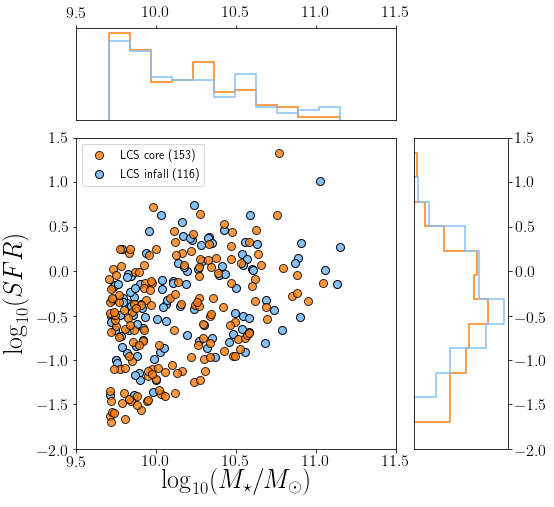

In [165]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# SFR- Mstar with B/T < 0.3 #

### SFR-M*: LCS infall vs GSWLC, with BT cut ###


* SFRs are not different
* stellar masses are very diff (more low-mass galaxies in gswlc)

**again, need mass-matched sample**

* make a cumulative histogram of core masses
* draw a random number [0,1]
* determine mass that corresponds to that point on cumulative histogram
* then select GSWLC galaxy with comparable mass
* how to avoid selecting the same galaxy multiple times?
  * pick closest galaxy that hasn't already been picked
* verify 

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in lcs sample =  71
number in gsw sample =  9088
just checking ... 9083 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.09
p-vale = 5.704e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.00
p-vale = 0.34829 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.23
p-vale = 1.275e-03 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   7.56
p-vale = 0.00057 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

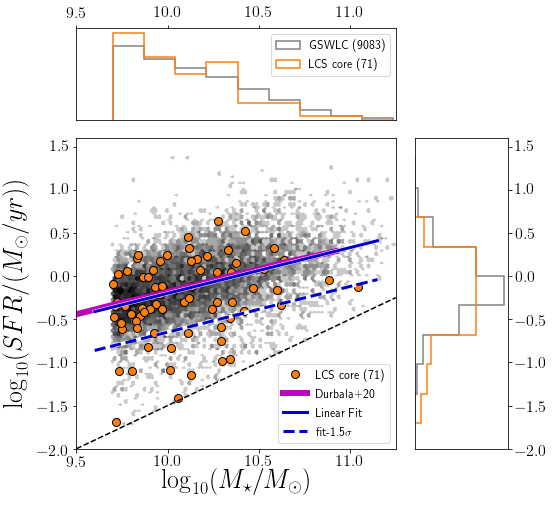

In [233]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

### LCS core vs GSWLC with B/T cut and mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in lcs sample =  71
number in gsw sample =  9088
just checking ... 1420 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.581e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.90
p-vale = 0.90824 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 6.076e-03 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   5.10
p-vale = 0.00334 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

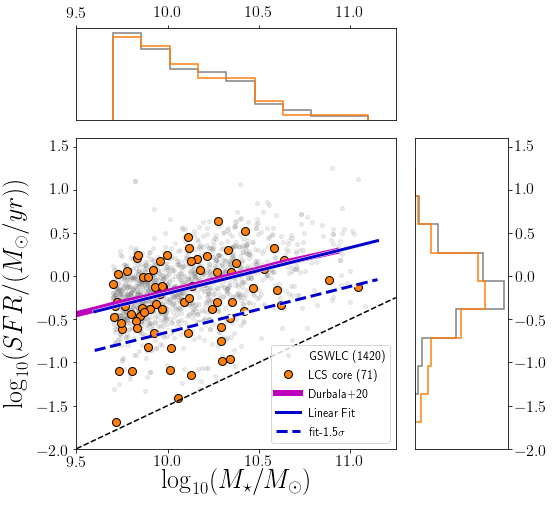

In [232]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False)

### SFR-M* :  LCS infall vs GSWLC - with BT cut ###

* SFRs are marginally different
* stellar masses are indistinguisable


got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in lcs sample =  66
number in gsw sample =  9088
just checking ... 9083 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 3.680e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.43
p-vale = 0.54746 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.10
p-vale = 4.576e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.44
p-vale = 0.55544 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

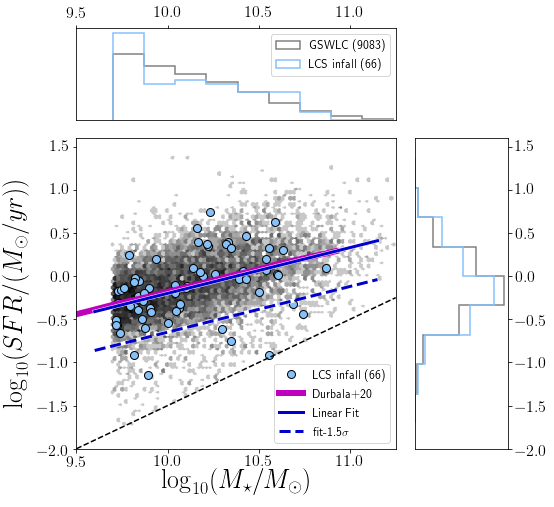

In [234]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',lcsmemb=True,outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)

### LCS infall vs GSWLC, with B/T and mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  66
number in gsw sample =  2877
just checking ... 1320 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.725e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.12
p-vale = 2.791e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

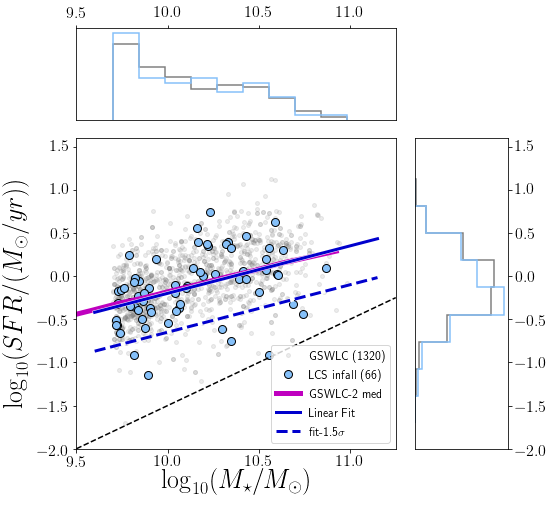

In [44]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',lcsinfall=True,outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=True)

### SFR - M*: LCS core vs infall, with B/T cut ###

* masses and SFRs are the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-2020Nov11-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  71
number in external sample =  66
just checking ... 71 66
9.702
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 8.039e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.15
p-vale = 3.596e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

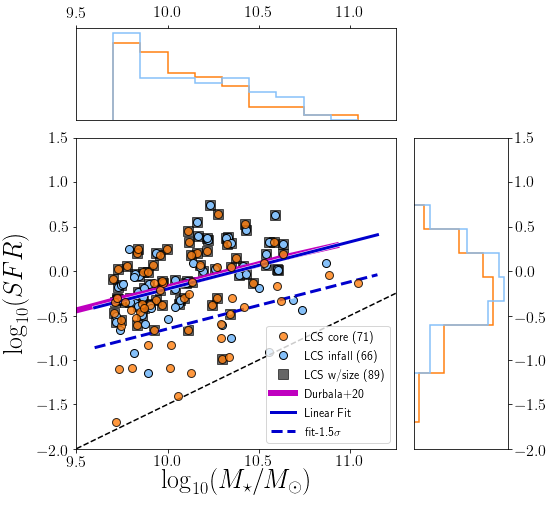

In [108]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# sSFR-Mstar: Compare LCS and GSWLC - no B/T cut #
# (updates from 7/1/2020) #

- limited by stellar mass, ssfr, and B/T < 0.3


### sSFR-M*: LCS core vs GSWLC Field, no BT cut ###

* sSFRs are different
* stellar masses are the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-2020Nov11-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  11524
just checking ... 11521 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 6.601e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.28
p-vale = 8.859e-11 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

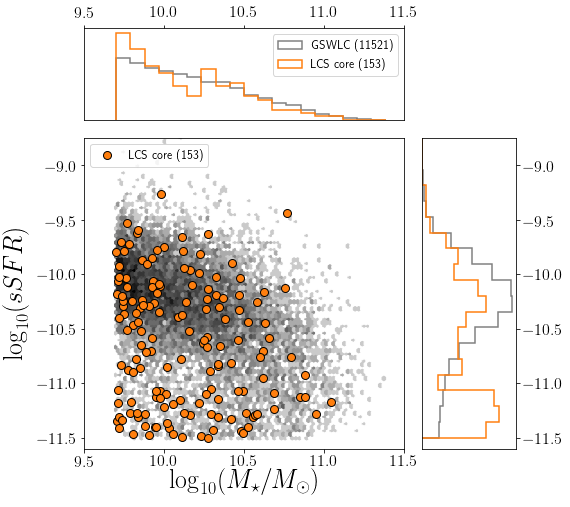

In [107]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False)

### sSFR-M*: LCS core vs GSWLC field, no BT cut, mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  4459
galaxies in slice < # requested 0 20 10.619 0.0758
	ruh roh - doubling mass and redshift slices
	ruh roh again - tripling mass and redshift slices
can't seem to find a match for mass =  10.619 89
skipping this galaxy
galaxies in slice < # requested 17 20 10.234 0.0157
galaxies in slice < # requested 0 20 10.77 0.2104
	ruh roh - doubling mass and redshift slices
	ruh roh again - tripling mass and redshift slices
can't seem to find a match for mass =  10.77 127
skipping this galaxy
galaxies in slice < # requested 0 20 10.47 0.0817
	ruh roh - doubling mass and redshift slices
	ruh roh again - tripling mass and redshift slices
can't seem to find a match for mass =  10.47 141
skipping this galaxy
AFTER MASS MATCHING
number of gswlc =  3060
number of lcs =  153
just checking ... 3060

<Figure size 489.6x360 with 0 Axes>

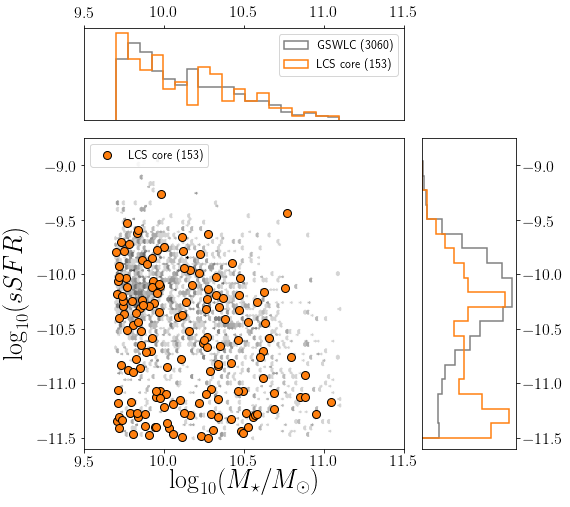

In [189]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-massmatch.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True)

### sSFR-M*: LCS infall vs GSWLC Field, no BT cut ###

* sSFRs are different
* stellar masses are the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  116
number in external sample =  4459
just checking ... 4459 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 1.548e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.15
p-vale = 1.360e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

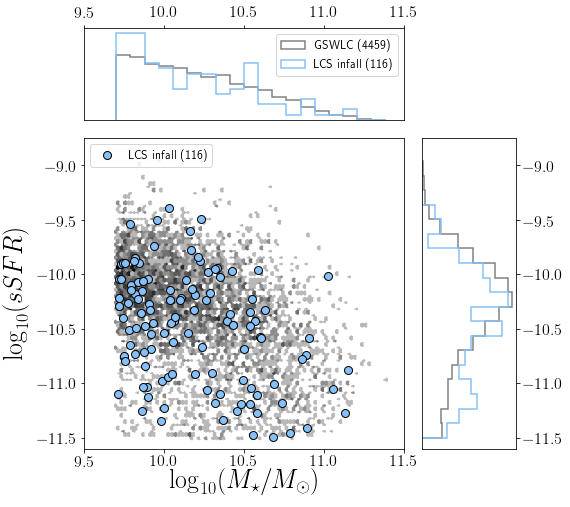

In [179]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=False)

### sSFR-M*: LCS core vs GSWLC field, no BT cut, mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  116
number in external sample =  4459
galaxies in slice < # requested 0 20 11.025 0.079
	ruh roh - doubling mass and redshift slices
	ruh roh again - tripling mass and redshift slices
can't seem to find a match for mass =  11.025 103
skipping this galaxy
AFTER MASS MATCHING
number of gswlc =  2320
number of lcs =  116
just checking ... 2320 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.05
p-vale = 9.593e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.16
p-vale = 4.429e-03 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

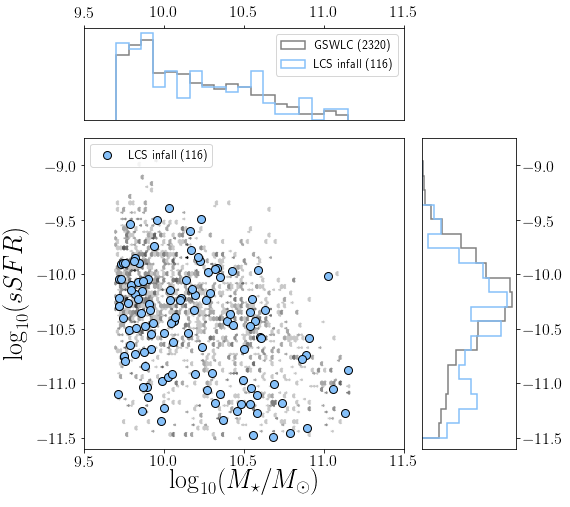

In [190]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-massmatch.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=True)

### sSFR-M*: LCS Core vs infall, no BT cut ###

* sSFRs are not significantly different
* stellar masses are the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  116
just checking ... 153 116
9.702
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.08
p-vale = 6.880e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.19
p-vale = 1.496e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

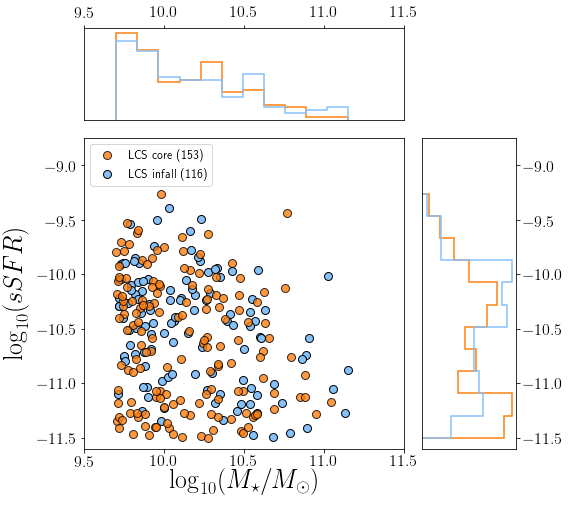

In [181]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar.png'
b.plot_ssfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# With B/T Cut #

### sSFR-M*: core vs GSWLC, with BT cut, no mass match ###

* sSFRs are different
* mstar is the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  71
number in external sample =  2877
just checking ... 2877 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 3.175e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.19
p-vale = 1.469e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

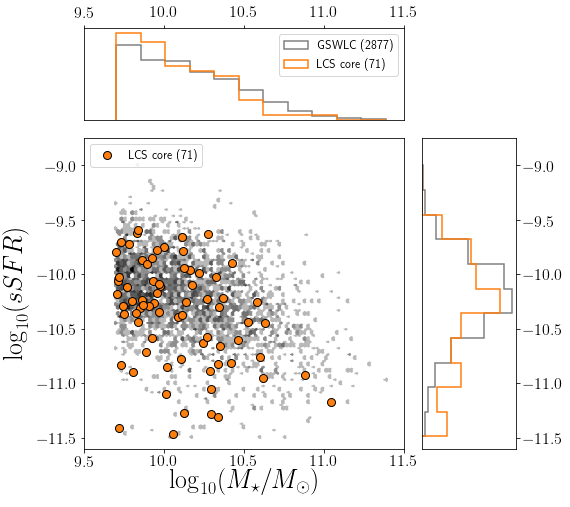

In [195]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,nbins=10,massmatch=False)

# With B/T Cut #

### sSFR-M*: core vs GSWLC, with BT cut, mass match ###


got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  71
number in external sample =  2877
galaxies in slice < # requested 16 20 11.044 0.036
AFTER MASS MATCHING
number of gswlc =  1420
number of lcs =  71
just checking ... 1420 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 8.914e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 5.608e-03 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

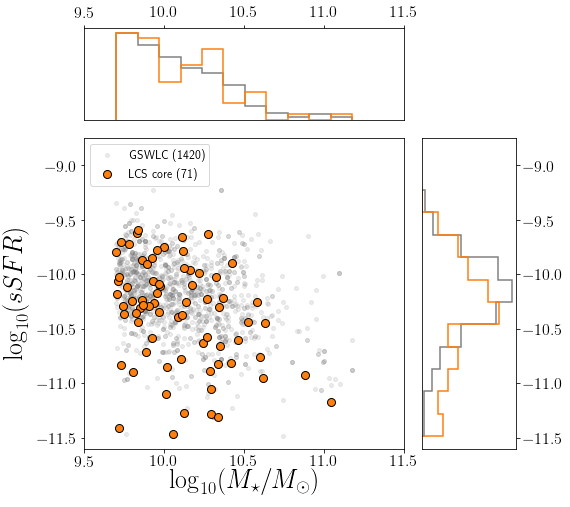

In [192]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-ssfrmstar-BTcut-massmatch.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,nbins=10,massmatch=True,hexbinflag=False)

### sSFR-M*: infall vs GSWLC with B/T cut, no mass match ###

* sSFRs are indistinguishable
* stellar masses are slightly different same




got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  66
number in external sample =  2877
just checking ... 2877 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.12
p-vale = 2.489e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.06
p-vale = 9.709e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

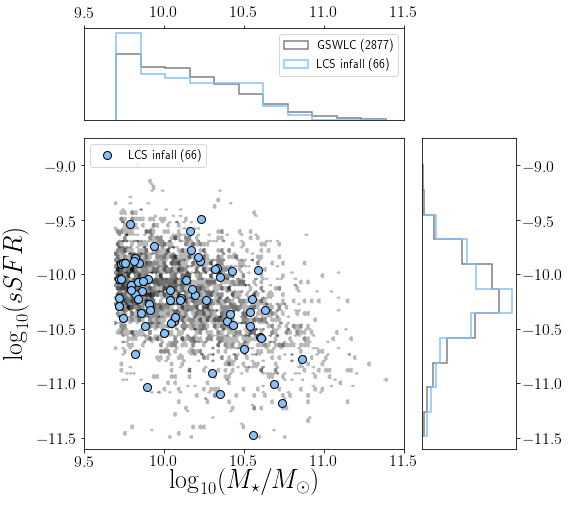

In [193]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,nbins=10,coreflag=False,massmatch=False)

# With B/T Cut #

### sSFR-M*: infall vs GSWLC, with BT cut, mass match ###


got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  66
number in external sample =  2877
galaxies in slice < # requested 18 20 10.689 0.0232
AFTER MASS MATCHING
number of gswlc =  1320
number of lcs =  66
just checking ... 1320 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.835e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.05
p-vale = 9.894e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

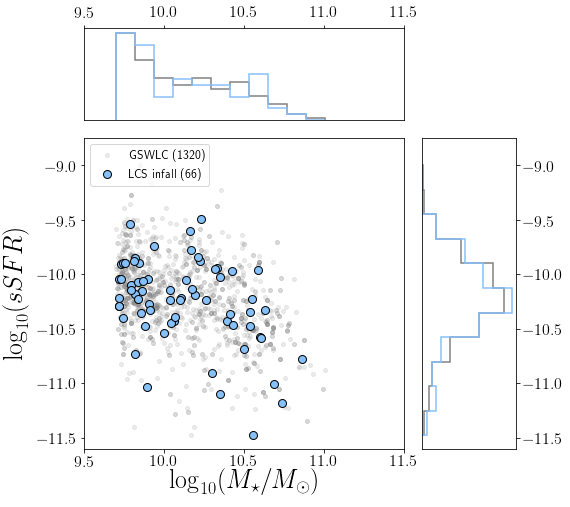

In [194]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-ssfrmstar-BTcut-massmatch.png'
b.plot_ssfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,nbins=10,massmatch=True,coreflag=False,hexbinflag=False)

### sSR-M*: LCS core vs infall with B/T cut###

* sSFRs are not different
* stellar masses are slightly different

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  71
number in external sample =  66
just checking ... 71 66
9.702
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 8.039e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 2.198e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

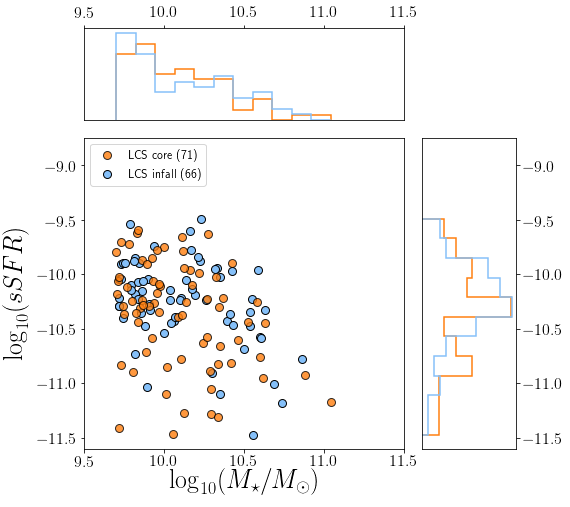

In [186]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
outfile1 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-ssfrmstar-BTcut.png'
b.plot_ssfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# Does sSFR correlate with size ratio #

* correlation is not super convincing, even if spearman rank says its 2.5 sigma

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
SpearmanrResult(correlation=0.18320640225262289, pvalue=0.009779655805273775)


<Figure size 489.6x360 with 0 Axes>

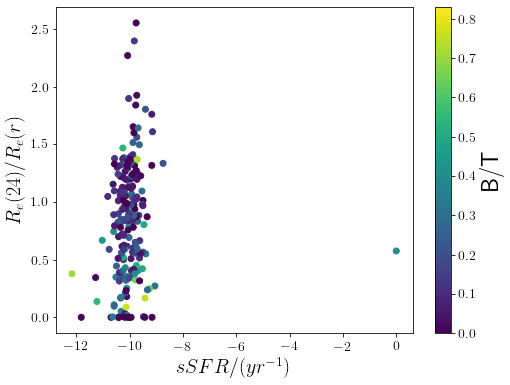

In [187]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py 
outfile1 = homedir+'/research/LCS/plots/lcs-ssfr-size.pdf'
outfile2 = homedir+'/research/LCS/plots/lcs-ssfr-size.png'
lcs.plot_ssfr_sizeratio(outfile1=outfile1,outfile2=outfile2)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
SpearmanrResult(correlation=0.19950291443764404, pvalue=0.012819043023943924)


<Figure size 489.6x360 with 0 Axes>

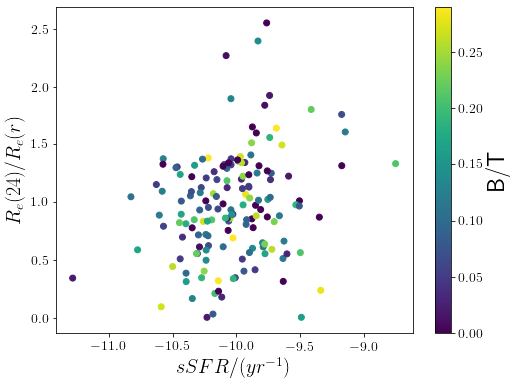

In [188]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT
outfile1 = homedir+'/research/LCS/plots/lcs-ssfr-size.pdf'
outfile2 = homedir+'/research/LCS/plots/lcs-ssfr-size.png'
lcs.plot_ssfr_sizeratio(outfile1=outfile1,outfile2=outfile2)

# Plot dSFR hist #

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.20961707746478872, pvalue=0.0034189294323311303)
Anderson_ksampResult(statistic=8.020239656120538, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS STATISTICS: FIELD VS INFALL
Ks_2sampResult(statistic=0.06818515258215962, pvalue=0.9002017612266741)
Anderson_ksampResult(statistic=-0.7937544017722467, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

KS STATISTICS: CORE VS INFALL
Ks_2sampResult(statistic=0.19953051643192488, pvalue=0.11036469906962787)
Anderson_ksampResult(statistic=1.1074426043479748, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.11394895899116876)


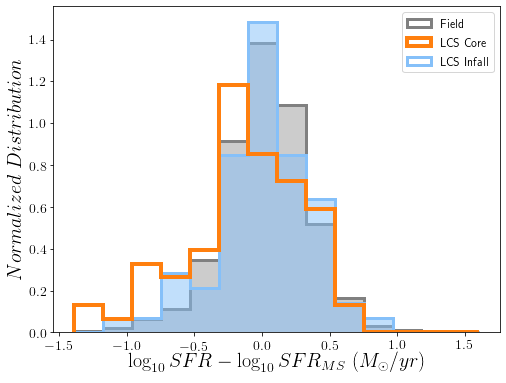

In [5]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2)

# The Effect of Selection Cuts on the Final Sample

* test one cut at a time to see whic halaxies drop out

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
just checking ... 54 50
0.0334145746375488
0.0052837612958248886
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.47
p-vale = 1.155e-05 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.19
p-vale = 2.596e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.02172921418204437, pvalue=0.8258564891239643)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

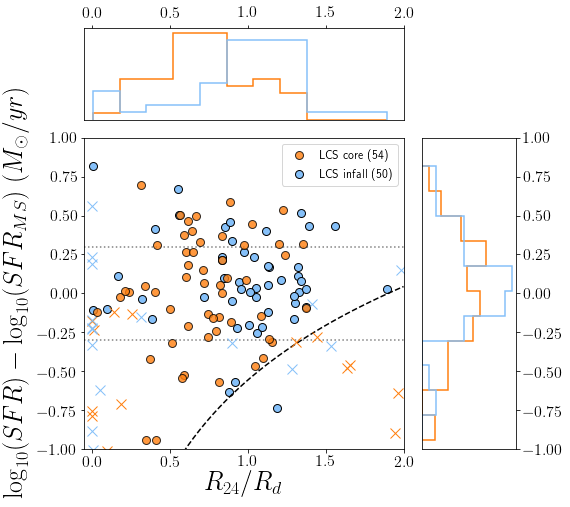

In [59]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.png'
b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2)


In [56]:
sum(b.lcs.cat['NSAID'] == 70696)

0

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-2020Nov11-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
just checking ... 45 44
0.0334145746375488
0.0052837612958248886
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.42
p-vale = 4.704e-04 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 2.753e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.014334354783792988, pvalue=0.8939362184438064)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

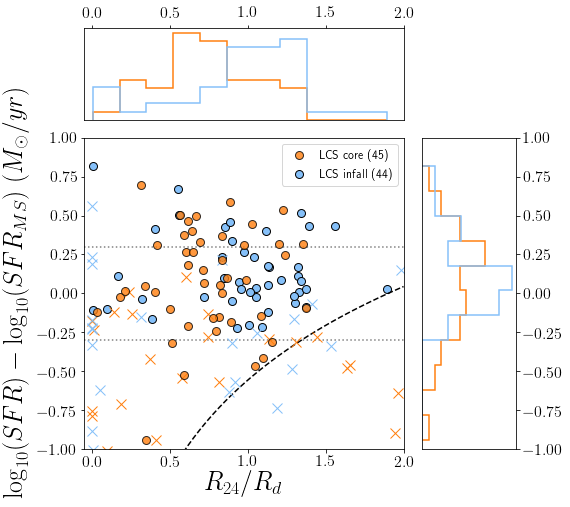

In [148]:
#### THIS IS SHOWING THE ORGINAL, BEFORE UPDATING FLAGS
#### LEAVE THIS FOR A COMPARISON

#b.lcs.cat['galfitflag2'] 
#b.lcs.cat['fcnumerical_error_flag24'] 
#b.lcs.cat['galfitflag2'] 
#b.lcs.cat['sbflag'] 
#b.lcs.cat['lirflag'] 
#b.lcs.cat['sizeflag']
#b.lcs.cat['galfitflag2']  
#b.lcs.cat['AGNKAUFF'] 
#b.lcs.cat['gim2dflag'] #
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.png'
b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2)


### GALFIT flag

not numerical error and mag > 0.1

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in sampleflag =  252 543
number in membflag =  285 543
number in both =  110
number in both and in sfr/mstar cut =  61
just checking ... 59 55
0.0334145746375488
0.0052837612958248886
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.33
p-vale = 2.460e-03 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 3.286e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=-0.09140814208280475, pvalue=0.32912446182140653)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

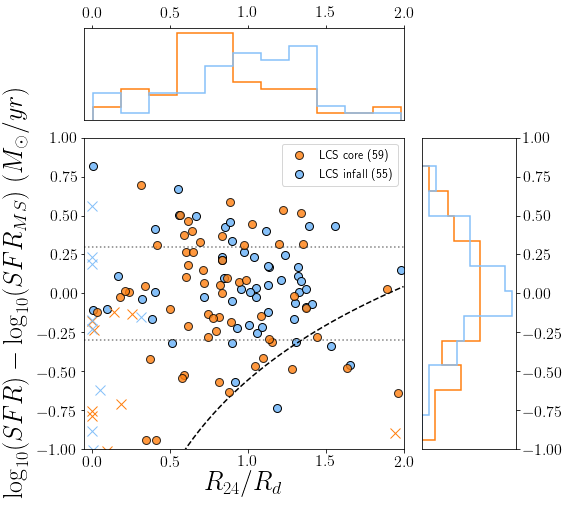

In [106]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
sampleflag = b.lcs.galfitflag
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.png'
b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2,sampleflag=sampleflag)


## Surface brightness flag

observed surface brightness < 20

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in sampleflag =  300 543
number in membflag =  285 543
number in both =  139
number in both and in sfr/mstar cut =  61
just checking ... 59 53
0.009576571478222247
0.0
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.31
p-vale = 6.025e-03 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.16
p-vale = 3.878e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.14457931148791545, pvalue=0.12316728050568429)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

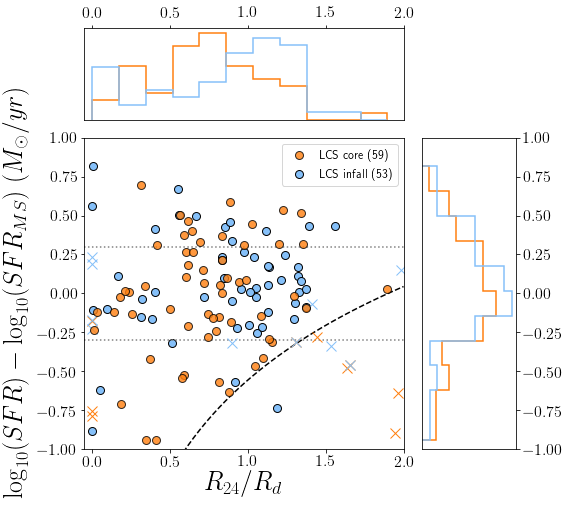

In [133]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
sampleflag = b.lcs.sbflag
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.png'
b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2,sampleflag=sampleflag)


## Size flag

r-band size greater than XX kpc, one mips pixel at YY

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in sampleflag =  511 543
number in membflag =  285 543
number in both =  265
number in both and in sfr/mstar cut =  73
just checking ... 69 62
0.0
0.0
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.29
p-vale = 5.622e-03 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.19
p-vale = 1.686e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.1168046615115753, pvalue=0.17566238654245053)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

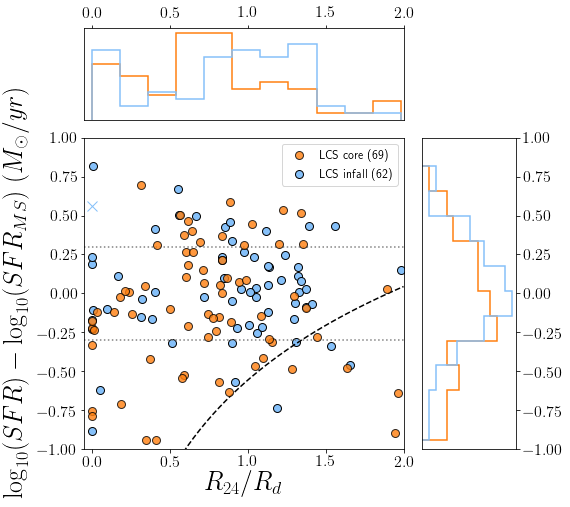

In [101]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
sampleflag = b.lcs.sizeflag
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.png'
b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2,sampleflag=sampleflag)


# LIR flag

The lir cut removes the galaxies shown with the X.

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in sampleflag =  234 543
number in membflag =  285 543
number in both =  100
number in both and in sfr/mstar cut =  65
just checking ... 62 57
0.009576571478222247
0.0
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.34
p-vale = 1.275e-03 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 2.848e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.01233700068359753, pvalue=0.8922702688673833)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

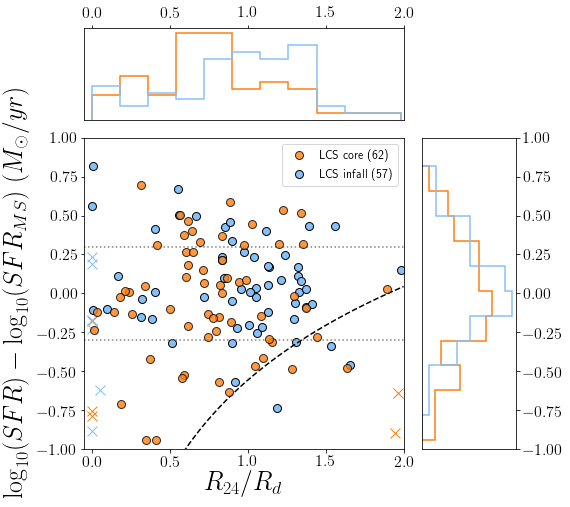

In [102]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
sampleflag = b.lcs.cat['lirflag']
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.png'
b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2,sampleflag=sampleflag)

# LIR, Surface Brightness, and Size flags

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in sampleflag =  208 543
number in membflag =  285 543
number in both =  91
number in both and in sfr/mstar cut =  61
just checking ... 59 50
0.009576571478222247
0.0052837612958248886
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.35
p-vale = 1.884e-03 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.19
p-vale = 2.431e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.13360610926982608, pvalue=0.1602007499482719)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

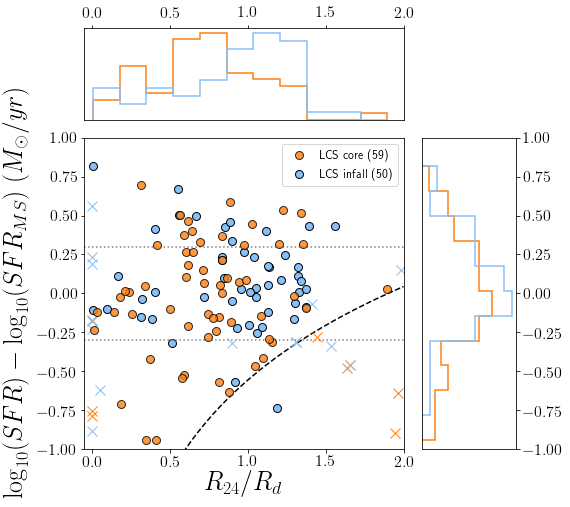

In [129]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
sampleflag = b.lcs.sbflag & b.lcs.sizeflag & b.lcs.cat['lirflag'] #& ~b.lcs.galfitflag
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.png'
b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2,sampleflag=sampleflag)


# Size, SB, LIR flag, but not GALFIT flag

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in sampleflag =  22 543
number in membflag =  285 543
number in both =  11
number in both and in sfr/mstar cut =  5
just checking ... 5 2
0.009576571478222247
0.005890056566874226
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.50
p-vale = 8.095e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.40
p-vale = 9.524e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.5357142857142858, pvalue=0.21521745567801273)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

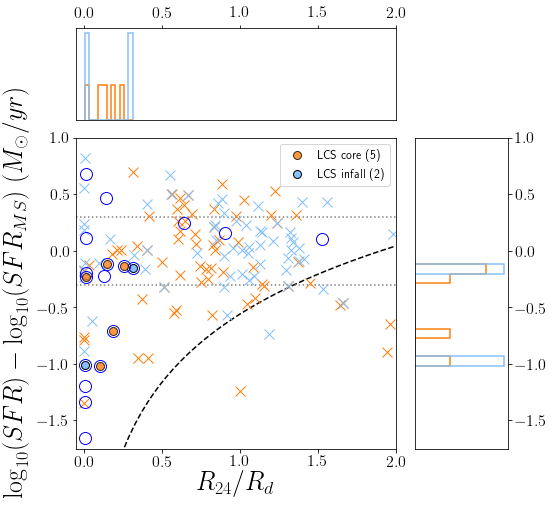

In [193]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
sampleflag = b.lcs.sbflag & b.lcs.sizeflag & b.lcs.cat['lirflag'] & ~b.lcs.galfitflag
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.png'
ax1,ax2,ax3 = b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2,sampleflag=sampleflag)
flag = b.lcs.sbflag & b.lcs.sizeflag & b.lcs.cat['lirflag'] & ~b.lcs.galfitflag  & (b.lcs.cat['DELTA_V'] < 3)
y = b.lcs.cat['logSFR'] - get_BV_MS(b.lcs.cat['logMstar'])
y = y[flag]
x = b.lcs.sizeratio[flag]
#plt.figure()
ax1.plot(x,y,'bo',markersize=12,mfc='None')

# Plot LIR vs GSWLC SFR

In [108]:
b.lcs.cat.colnames

['NSAID',
 'IAUNAME',
 'SUBDIR',
 'RA_1',
 'DEC_1',
 'ZDIST',
 'SERSIC_TH50',
 'SERSIC_N',
 'SERSIC_BA',
 'SERSIC_PHI',
 'PETROTH50',
 'PETROTH90',
 'D4000',
 'HAEW',
 'VDISP',
 'FA',
 'HAFLUX',
 'N2FLUX',
 'HBFLUX',
 'O3FLUX',
 'AHDEW',
 'AV_1',
 'ISDSS',
 'IALFALFA',
 'NMGY',
 'NMGY_IVAR',
 'ABSMAG',
 'SERSICFLUX',
 'CLUMPY',
 'ASYMMETRY',
 'RUN',
 'CAMCOL',
 'FIELD',
 'RERUN',
 'HIMASS',
 'AGNKAUFF',
 'AGNKEWLEY',
 'AGNSTASIN',
 'AGCNUMBER',
 'fmag1',
 'fmag1err',
 'fnsersic1',
 'fnsersic1err',
 'fre1',
 'fre1err',
 'faxisratio1',
 'faxisratio1err',
 'fpa1',
 'fpa1err',
 'fxc1',
 'fyc1',
 'fnumerical_error_flag24',
 'fchi2nu',
 'fcmag1',
 'fcmag1err',
 'fcnsersic1',
 'fcnsersic1err',
 'fcre1',
 'fcre1err',
 'fcaxisratio1',
 'fcaxisratio1err',
 'fcpa1',
 'fcpa1err',
 'fcxc1',
 'fcyc1',
 'fcnumerical_error_flag24',
 'fcchi2nu',
 'matchflag',
 'B_T_r',
 'e__B_T_r_1',
 'S2g_1',
 'Re_1',
 'e_Re_1',
 'Rd_1',
 'e_Rd_1',
 'Rhlr_2',
 'ng',
 'e_ng',
 'p_elliptical',
 'p_spiral',
 'p_el',
 'p_

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543


<Figure size 489.6x360 with 0 Axes>

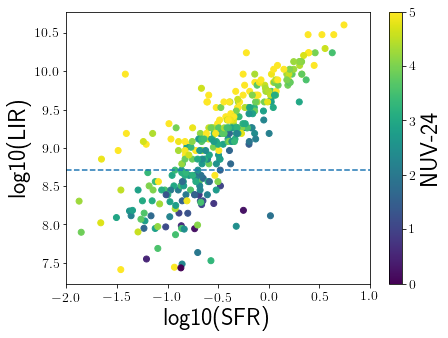

In [127]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
plt.figure()
plt.scatter(b.lcs.cat['logSFR'],np.log10(b.lcs.cat['LIR_ZDIST']),c=b.lcs.NUV24,vmin=0,vmax=5)
plt.colorbar(label='NUV-24')
plt.xlim(-2,1)
plt.xlabel('log10(SFR)')
plt.ylabel('log10(LIR)')
plt.axhline(y=np.log10(5.2e8),ls='--')

# Dec 2, 2020
### Which flags are most important

* galfit numerical error - (59,58)
* galfit - (52,49)
* lirflag - a dozen galaxies 
* size cut - only 2 galaxies
* agn flag - less than 10 that are still considered AGN by Kauffmann criteria
* sb cut - 10 ish
* galfit + lirflag + sbflag - (52, 49)

### Mass cut
 * using 9.7 eliminates a lot of galaxies with size measurement - stick with this because we need to link with the SFR
 
### SFR cut
* compare SFR
 
 
## For next time

* inspect visual images for galaxies that meet all flags except galfit numerical error flag
* see if there are any we can save

In [19]:
# get galaxies that make lir, size, and sb cuts but not galfit cuts

flag = b.lcs.cat['lirflag'] & b.lcs.cat['sizeflag'] & b.lcs.cat['sbflag'] & ~b.lcs.cat['AGNKAUFF'] & ~b.lcs.cat['galfitflag2']
print(sum(flag))
#flag = b.lcs.cat['lirflag'] & b.lcs.cat['sizeflag'] & b.lcs.cat['sbflag'] & ~b.lcs.cat['AGNKAUFF'] & ~b.lcs.cat['fcnumerical_error_flag24']
#print(sum(flag))
print(sum(~b.lcs.cat['galfitflag'] & b.lcs.cat['galfitflag2']))

print('###################')
nsaid = b.lcs.cat['NSAID'][flag]
cluster = b.lcs.cat['CLUSTER'][flag]
for n,c in zip(nsaid,cluster): print(c,n)

25
98
###################
MKW11    78100
NGC6107  43835
NGC6107  69593
NGC6107  69625
NGC6107  69629
MKW8     18098
Hercules 99509
A2063    72633
A2063    72635
A2063    72703
A2063    72710
A2063    72769
A2063    72799
A2063    72800
A2063    79773
A2063    79839
A2052    72490
A2052    79378
A2052    79381
A2052    79416
A2052    79531
A2052    79671
A2052    79678
A2052    80875
Coma     103921


In [198]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.sbflag & b.lcs.sizeflag & b.lcs.cat['lirflag'] & ~b.lcs.galfitflag  & (b.lcs.cat['DELTA_V'] < 3)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543


<Figure size 489.6x360 with 0 Axes>

# Properties of Galaxies that meet all cuts except for GALFIT

NOTE, this does not apply the stellar mass and sSFR cuts.  The second figure shows those.  There are 7 galaxies that meet all the cuts (including stellar mass and sSFR) but have a GALFIT error.

In [183]:
flag = b.lcs.sbflag & b.lcs.sizeflag & b.lcs.cat['lirflag'] & ~b.lcs.galfitflag  & (b.lcs.cat['DELTA_V'] < 3) 
flag = flag & b.mass_sfr_flag
shortlcscat = b.lcs.cat[flag]
print(sum(flag))

7


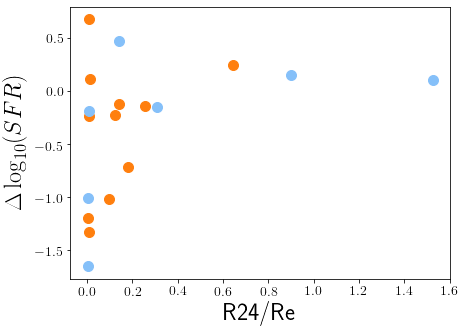

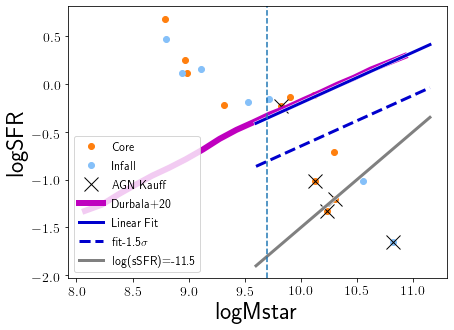

In [202]:
flag = b.lcs.sbflag & b.lcs.sizeflag & b.lcs.cat['lirflag'] & ~b.lcs.galfitflag  & (b.lcs.cat['DELTA_V'] < 3) 
memb = flag & b.lcs.membflag
infall = flag & b.lcs.infallflag
y = b.lcs.cat['logSFR'] - get_BV_MS(b.lcs.cat['logMstar'])
x = b.lcs.sizeratio
plt.figure()
plt.plot(x[memb],y[memb],'bo',markersize=10,color=darkblue)
plt.plot(x[infall],y[infall],'bo',markersize=10,color=lightblue)
plt.xlabel('R24/Re')
plt.ylabel('$\Delta \log_{10}(SFR)$')
plt.figure()
x = b.lcs.cat['logMstar']
plt.plot(x[memb],y[memb],'ko',c=darkblue,label='Core')
plt.plot(x[infall],y[infall],'ko',c=lightblue,label='Infall')
flag2 = b.lcs.cat['AGNKAUFF'] & flag
plt.plot(x[flag2],y[flag2],'kx',markersize=14,label='AGN Kauff')
plot_BV_MS(plt.gca())
plot_GSWLC_sssfr()
plt.legend(loc='lower left')
plt.xlabel('logMstar')
plt.ylabel('logSFR')
plt.axvline(x=9.7,ls='--')

# Looking at GALFIT models for these galaxies

### 2020-12-16

* I transfered galfit images to linux laptop
  * /home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/
  
* fits are then in subdirectories by cluster name, then 24um

## Results

Most are consistent with being point sources.

One has $SNR_{24\mu m} < 5$, so we should probably dump this one.

| NSAID | Include | Comments|
|--------|---------|---------|
|NGC6107-69625 |N |error on n and mag are high, not a good fit |
|Hercules-99509|Y | n is held at 4, other param ok, |
|A2063-72635 |N |error n is high, snr < 5 |
|A2063-72800 |Y|other params ok, num err on Re|
|A2052-79381 |Y |n fixed at 5, otherwise ok|
|Coma-103628 |Y|n is 5+/-5, but othewise ok|
|Coma-103773 |? |num err on n, high err on mag|

Adding yeses to galfit override list.

1_XC  : 20.4061 +/- 0.0917
1_YC  : 21.6695 +/- 0.1591
1_MAG : 16.0194 +/- 0.0709
1_RE  : 0.6455 +/- 1.9036
1_N   : 0.0540 +/- 1.2414
1_AR  : 0.5400
1_PA  : 74.8500
2_SKY : -0.0154 +/- 0.0023


<Figure size 489.6x360 with 0 Axes>

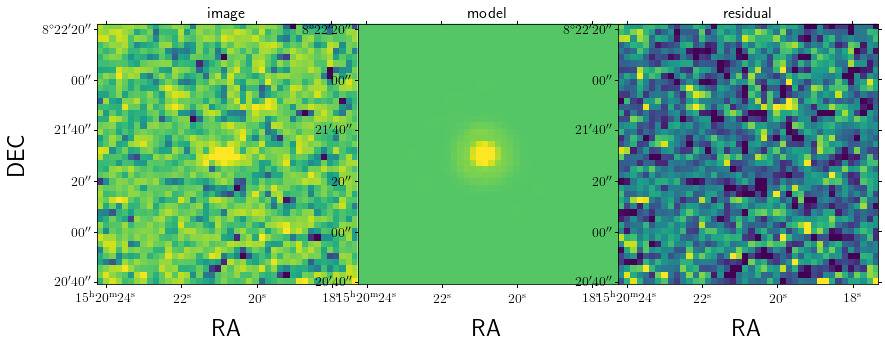

In [216]:
### EXAMPLE OF HOW TO DISPLAY ONE IMAGE
galbasedir = '/home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/'
cluster = 'A2063'
nsaid = '72710'
galdir = os.path.join(galbasedir,cluster,'24um')
galfilename = '-'.join([cluster,nsaid,'24-fixedBA-1Comp-galfit-out.fits'])
galfile = os.path.join(galdir,galfilename)
%run ~/github/LCS/python/Python3/display_galfit.py
display_galfit_model(galfile)
print_galfit_model(galfile)

/home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/NGC6107/24um/NGC6107-69625-24-fixedBA-1Comp-galfit-out.fits
1_XC  : 12.8283 +/- 1.0124
1_YC  : 13.2669 +/- 1.1113
1_MAG : 15.1866 +/- 23.2425
1_RE  : *0.0114* +/- *0.8741*
1_N   : 8.6799 +/- 249.2779
1_AR  : 0.8100
1_PA  : 54.2000
2_SKY : -1.223e-03 +/- 2.979e-03
SNR = 7.59


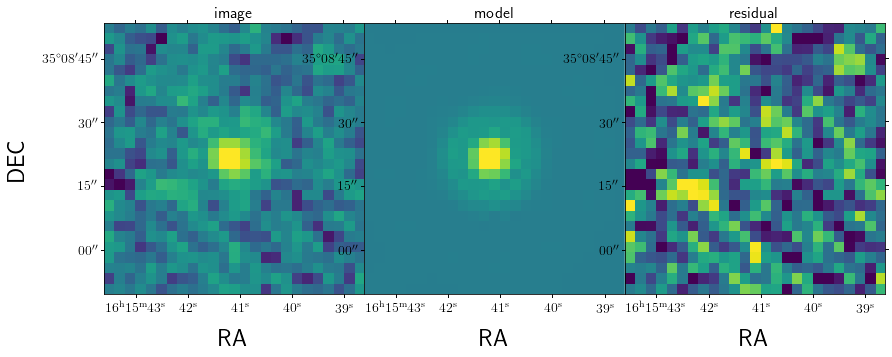

/home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/Hercules/24um/Hercules-99509-24-fixedBA-1Comp-galfit-out.fits
1_XC  : 19.2439 +/- 0.0111
1_YC  : 19.9757 +/- 0.0136
1_MAG : 13.2874 +/- 0.0055
1_RE  : *0.2285* +/- *0.0191*
1_N   : 4.0000
1_AR  : 0.1500
1_PA  : -61.6800
2_SKY : -4.259e-03 +/- 2.294e-03
SNR = 16.46


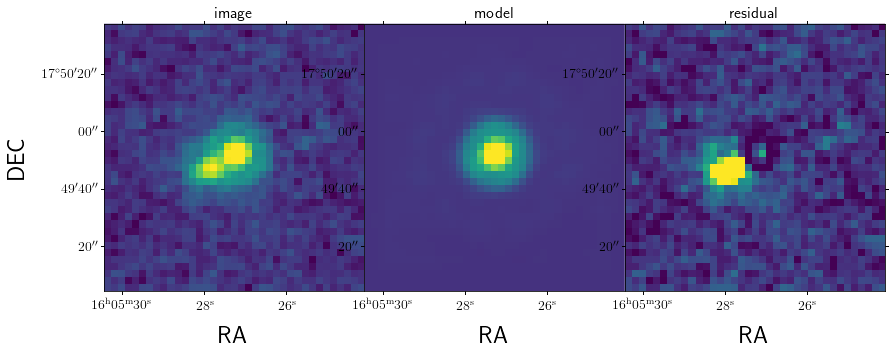

/home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/A2063/24um/A2063-72635-24-fixedBA-1Comp-galfit-out.fits
1_XC  : 21.5779 +/- 0.2609
1_YC  : 21.6020 +/- 0.2194
1_MAG : 15.7866 +/- 0.1154
1_RE  : *0.2832* +/- *0.5132*
1_N   : 3.2695 +/- 11.1037
1_AR  : 0.6500
1_PA  : -7.6200
2_SKY : -0.0201 +/- 0.0020
SNR = 4.54


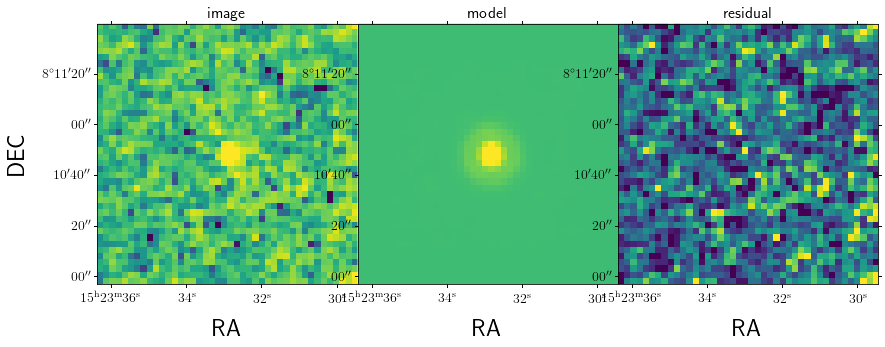

/home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/A2063/24um/A2063-72800-24-fixedBA-1Comp-galfit-out.fits
1_XC  : 18.8232 +/- 0.4825
1_YC  : 19.5376 +/- 0.1464
1_MAG : 15.5846 +/- 0.0339
1_RE  : *0.2799* +/- *0.8362*
1_N   : 1.3035 +/- 7.9918
1_AR  : 0.3500
1_PA  : -26.4400
2_SKY : -0.0151 +/- 0.0023
SNR = 5.16


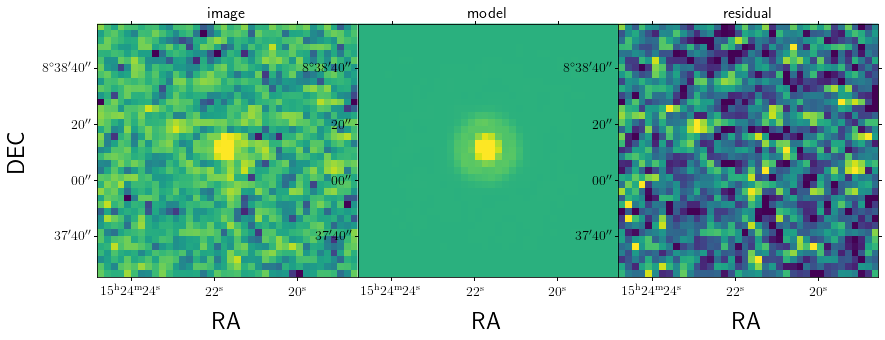

/home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/A2052/24um/A2052-79381-24-fixedBA-1Comp-galfit-out.fits
1_XC  : 18.6965 +/- 0.2257
1_YC  : 19.1085 +/- 0.1133
1_MAG : 14.9814 +/- 0.0245
1_RE  : *0.2173* +/- *0.0708*
1_N   : 5.0000
1_AR  : 0.4000
1_PA  : 12.3000
2_SKY : -3.718e-03 +/- 2.429e-03
SNR = 8.19


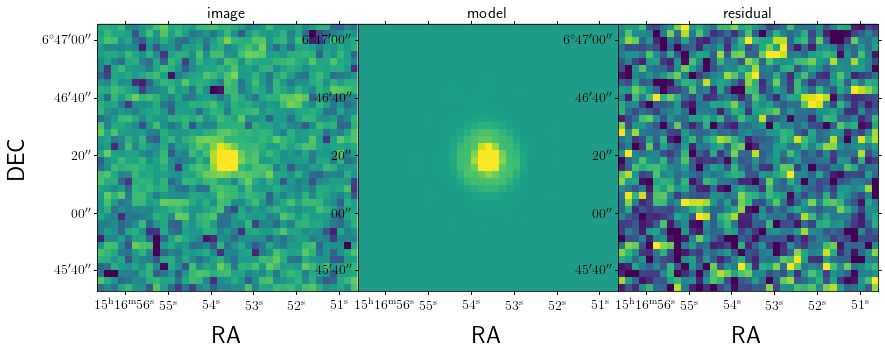

/home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/Coma/24um/Coma-103628-24-fixedBA-1Comp-galfit-out.fits
1_XC  : 20.8053 +/- 0.0582
1_YC  : 21.5071 +/- 0.0616
1_MAG : 14.7522 +/- 0.0885
1_RE  : *0.1637* +/- *0.1400*
1_N   : 5.1115 +/- 5.7257
1_AR  : 0.8100
1_PA  : -44.2900
2_SKY : 2.383e-03 +/- 1.492e-03
SNR = 11.48


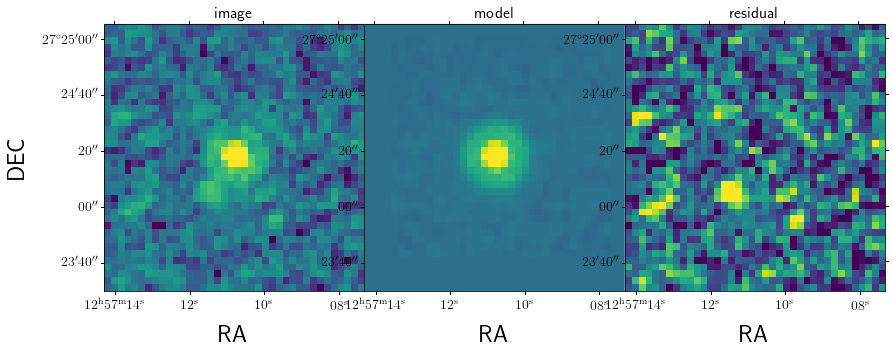

/home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/Coma/24um/Coma-103773-24-fixedBA-1Comp-galfit-out.fits
1_XC  : 20.4482 +/- 7.0637
1_YC  : 21.1325 +/- 1.5454
1_MAG : 14.8909 +/- 5.1456
1_RE  : *0.0115* +/- *0.0706*
1_N   : 6.0000
1_AR  : 0.1800
1_PA  : 26.5800
2_SKY : 0.0161 +/- 0.0015
SNR = 9.12


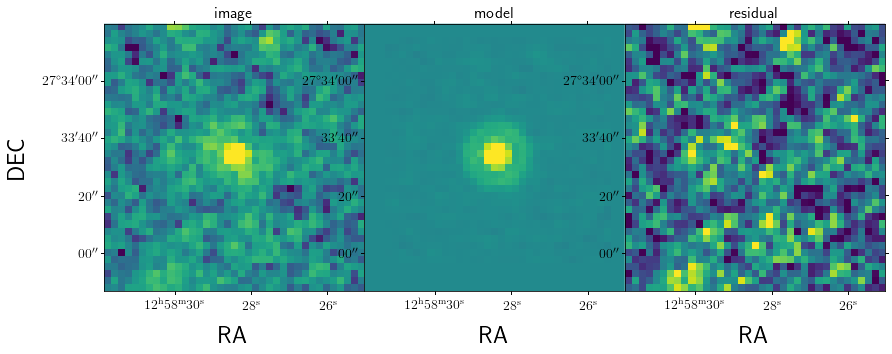

In [184]:
###
### DISPLAYING IMAGES FOR ALL 7 GALAXIES THAT MEET ALL SELECTION CRITERIA EXCEPT GALFIT
###
galbasedir = '/home/rfinn/research/LCS/LocalClusters/GalfitAnalysis/'
cluster = 'A2063'
nsaid = '72710'
galdir = os.path.join(galbasedir,cluster,'24um')
galfilename = '-'.join([cluster,nsaid,'24-fixedBA-1Comp-galfit-out.fits'])
galfile = os.path.join(galdir,galfilename)
for i in range(len(shortlcscat)):
    snr = shortlcscat['FLUX24'][i]/shortlcscat['FLUX24ERR'][i]
    cluster = shortlcscat['CLUSTER'][i].rstrip()
    nsaid = shortlcscat['NSAID'][i]
    galdir = os.path.join(galbasedir,cluster,'24um')
    galfilename = '-'.join([cluster,str(nsaid),'24-fixedBA-1Comp-galfit-out.fits'])
    galfile = os.path.join(galdir,galfilename)
    print(galfile)
    try:
        print_galfit_model(galfile)
        print('SNR = {:.2f}'.format(snr))
        display_galfit_model(galfile)
    except FileNotFoundError:
        # check for model with no convolution
        pass
    plt.pause(1)

## NOTES from 2020-12-16 meeting

NEXT STEPS
* for objects that are point source like, assign an upper limit 
* DR10 AGN - read which selection criteria they use.  Why do we still have 10 galaxies that are considered AGN according to the Kauffmann criteria?

  
DONE
* schedule a 3 hr meeting after break
* remove constraint that Re/Re_err must be greater than some value
* check through flags to understand which galaxies are removed by each selection criteria
  * see plots above and summary below
* how many galaxies in the A100 catalog are in the FOV but not in the NSA?
  * could run galfit on these and add them to our catalog
  * except that they are probably not in the GSWLC if they are not in the NSA, right?
  * but we could get legacy photometry - or use stellar mass from durbala+2020
  * either way, it would be good to know the number.  if it's only 3, then it's not worth the effort.
  * could do match with topcat - in a100 but not in NSA
    * then in ds9, load mosaic
    * send catalog to ds9
  * CONCLUSION - only 1 A100 only galaxy that has good SNR! so cross this off the list...

# Summary

After checking through the sources, there are only 7 galaxies that meet the lir, size, sb, stellar mass and ssfr cuts, but have a problem with the galfit model.  Most of these have very small values of Re.  I am letting them stay in the sample.  If we include 4 of them based on the inspection of the galfit model, then we get the plot below.  Size ratios are sig different, and SFRs are not ($pvalue=0.3$).  The observational result persists: galaxies with small size ratios do not necessarily have smaller size ratios.  If we include all 7, then pvalue in sfr comparison is pretty much the same.

It does look like there is a tail toward lower SFRs in the core.


## How does this impact the modeling?

where is the input catalog generated for the modeling?  Currently, it reads the main data table and uses the sampleflag that is in that table.  I have cleaned up that flag in the lcs_paper2, so I should write out the resulting table with the new flags.

Or I could just overwrite the sampleflag for these few galaxies?



got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in sampleflag =  189 543
number in membflag =  285 543
number in both =  82
number in both and in sfr/mstar cut =  58
fraction of core with dsfr below 0.3dex = 0.190 (11/58)
fraction of core with dsfr below 0.3dex = 0.060 (3/50)
just checking ... 58 50
0.0334145746375488
0.0052837612958248886
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.33
p-vale = 4.601e-03 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   3.87
p-vale = 0.00910 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.18
p-vale = 3.059e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.35
p-vale = 0.24178 (prob that samples are from same 

<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

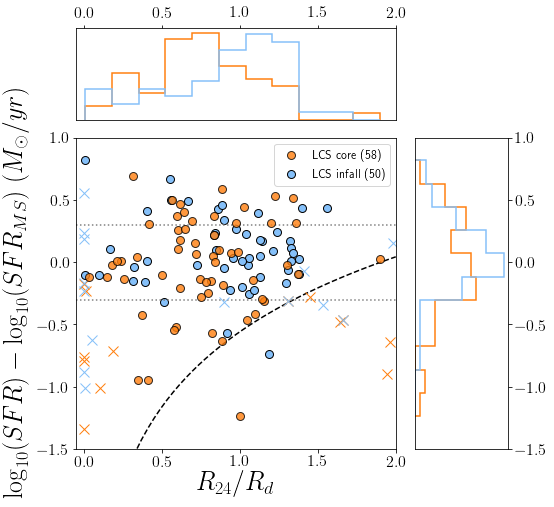

In [277]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
sampleflag = b.lcs.sizeflag & b.lcs.sbflag & b.lcs.cat['lirflag'] & b.lcs.galfitflag
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio.png'
ax1,ax2,ax3 = b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2)#,sampleflag=sampleflag)

## Without B/T cut

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1376 1376 1376 1376
number in sampleflag =  258 1376
number in membflag =  889 1376
number in both =  113
number in both and in sfr/mstar cut =  78
fraction of core with dsfr below 0.3dex = 0.218 (17/78)
fraction of core with dsfr below 0.3dex = 0.149 (10/67)
just checking ... 77 66
0.006496057179138259
0.0037493775867791157
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.34
p-vale = 3.797e-04 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   6.26
p-vale = 0.00140 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.10
p-vale = 8.701e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.84
p-vale = 0.84667 (prob that samples are from s

<Figure size 489.6x360 with 0 Axes>

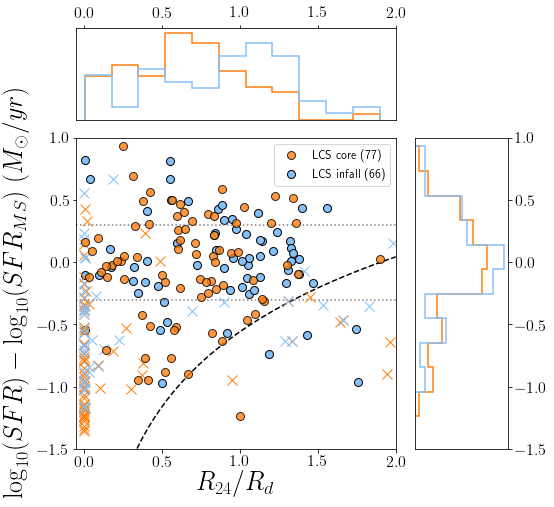

In [231]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
sampleflag = b.lcs.sizeflag & b.lcs.sbflag & b.lcs.cat['lirflag'] & b.lcs.galfitflag
outfile1 = homedir+'/research/LCS/plots/delta-sfr-sizeratio-noBTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-sizeratio-noBTcut.png'
ax1,ax2,ax3 = b.plot_dsfr_sizeratio(outfile1=outfile1,outfile2=outfile2)#,sampleflag=sampleflag)

In [225]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543


# Sample Statistics

number with sfr and size measurements for core and infall

In [230]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number of core galaxies =  73
	 with size measurements =  58
number of core galaxies =  64
	 with size measurements =  50
number of GSW galaxies =  9088


# $\Delta$ SFR and HI Deficiency

* cross-matched our LCS catalog with A100 - 94 matches
* can calculate HI def from Petro r 90 
  * correct radius according to https://www.aanda.org/articles/aa/full_html/2013/12/aa21326-13/aa21326-13.html
  * this says $D_{25} = 1.58 D_{SDSS}$, where $D_{SDSS}$ is the 90 Petrosian R-band
* scaling relation for HI mass and D25 for AMIGA galaxies is here: https://www.aanda.org/articles/aa/full_html/2018/01/aa31448-17/aa31448-17.html
  * gradient = 0.86 ± 0.04 	
  * intercept = 7.32 ± 0.13
  * logMHI = a + b* 2 logD25_kpc


got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-2020Nov11-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
just checking ... 15 12
0.042752266
-0.027439117
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.43
p-vale = 1.263e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.35
p-vale = 3.142e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.17835212246109816, pvalue=0.3287516451016239)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

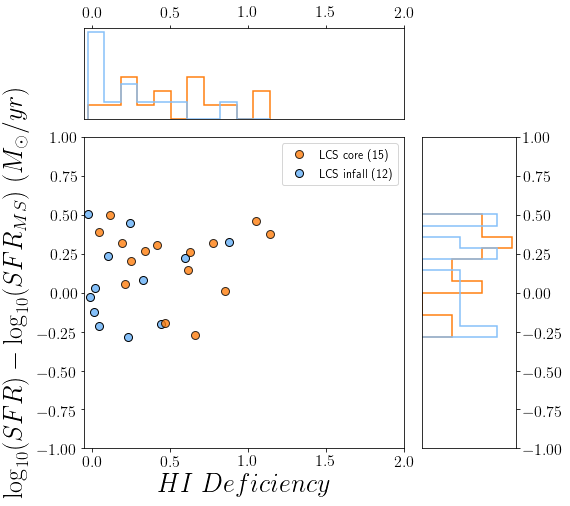

In [91]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9
outfile1 = homedir+'/research/LCS/plots/delta-sfr-HIdef.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-HIdef.png'
b.plot_dsfr_HIdef(outfile1=outfile1,outfile2=outfile2)

# Summary Statistics

* running mass, SFR and sSFR comparisons all at once to help with creating tables

In [259]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
b.ks_stats()

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
########################################
LCS Core vs Field: SFR
	D = 2.53e-01, pvalue = 1.47e-04
LCS Core vs Field: dSFR
	D = 2.09e-01, pvalue = 2.89e-03
LCS Core vs Field: Mstar
	D = 8.09e-02, pvalue = 6.99e-01
########################################
LCS Infall vs Field: SFR
	D = 6.88e-02, pvalue = 9.05e-01
LCS Infall vs Field: dSFR
	D = 7.34e-02, pvalue = 8.59e-01
LCS Infall vs Field: Mstar
	D = 1.24e-01, pvalue = 2.61e-01
########################################
LCS Core vs Infall: SFR
	D = 2.06e-01, pvalue = 9.25e-02
LCS Core vs Infall: dSFR
	D = 1.96e-01, pvalue = 1.22e-01
LCS Core vs Infall: Mstar
	D = 9.31e-02, pvalue = 8.92e-01


In [260]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
b.ks_stats(massmatch=True)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
########################################
LCS Core vs Field: SFR
	D = 2.34e-01, pvalue = 8.25e-04
LCS Core vs Field: dSFR
	D = 2.05e-01, pvalue = 4.81e-03
LCS Core vs Field: Mstar
	D = 8.77e-02, pvalue = 6.30e-01
########################################
LCS Infall vs Field: SFR
	D = 5.55e-02, pvalue = 9.87e-01
LCS Infall vs Field: dSFR
	D = 7.27e-02, pvalue = 8.84e-01
LCS Infall vs Field: Mstar
	D = 5.86e-02, pvalue = 9.78e-01


### Without B/T Cut

In [261]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
b.ks_stats()

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1376 1376 1376 1376
########################################
LCS Core vs Field: SFR
	D = 3.10e-01, pvalue = 2.50e-13
LCS Core vs Field: dSFR
	D = 3.10e-01, pvalue = 2.48e-13
LCS Core vs Field: Mstar
	D = 1.06e-01, pvalue = 6.21e-02
########################################
LCS Infall vs Field: SFR
	D = 1.78e-01, pvalue = 1.71e-03
LCS Infall vs Field: dSFR
	D = 1.58e-01, pvalue = 7.18e-03
LCS Infall vs Field: Mstar
	D = 8.48e-02, pvalue = 3.96e-01
########################################
LCS Core vs Infall: SFR
	D = 1.78e-01, pvalue = 2.64e-02
LCS Core vs Infall: dSFR
	D = 2.09e-01, pvalue = 5.49e-03
LCS Core vs Infall: Mstar
	D = 7.17e-02, pvalue = 8.57e-01


In [262]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
b.ks_stats(massmatch=True)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1376 1376 1376 1376
########################################
LCS Core vs Field: SFR
	D = 2.95e-01, pvalue = 6.35e-12
LCS Core vs Field: dSFR
	D = 3.13e-01, pvalue = 1.93e-13
LCS Core vs Field: Mstar
	D = 6.22e-02, pvalue = 5.94e-01
########################################
LCS Infall vs Field: SFR
	D = 1.73e-01, pvalue = 2.79e-03
LCS Infall vs Field: dSFR
	D = 1.58e-01, pvalue = 8.31e-03
LCS Infall vs Field: Mstar
	D = 4.91e-02, pvalue = 9.47e-01
